### Objective:
To predict fraudulent credit card transactions with the help of machine learning models and suggest the best model for the same.

In [1]:
import numpy as np 
import pandas as pd 

# for standardization
from sklearn.preprocessing import StandardScaler as ss

# for splitting into train and test datasets
from sklearn.model_selection import train_test_split 

# for modelling
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# for balancing dataset by oversampling
from imblearn.over_sampling import SMOTE, ADASYN

# for performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import auc, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn import metrics

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Miscellaneous
import time
import random
import os

In [2]:
# set number of rows to be displayed
pd.options.display.max_columns = 300

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

#### All the features have gone  through a PCA transformation (Dimensionality Reduction technique) Except for time and amount.

In [4]:
print('Shape: ',data.shape)

print('\nColumns: ',data.columns.values)

print('\nData types:\n',data.dtypes.value_counts())

Shape:  (284807, 31)

Columns:  ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']

Data types:
 float64    30
int64       1
dtype: int64


In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

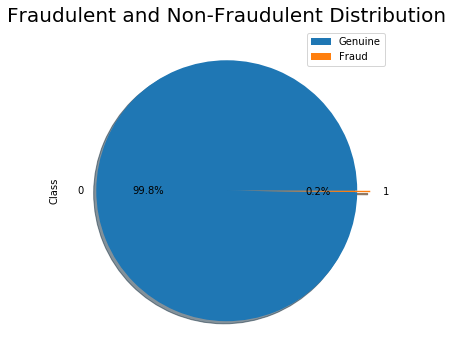

In [6]:
data['Class'].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine", "Fraud"])
plt.show()

In [7]:
# check if there are null values in the dataset
data.isnull().sum().sum()

0

#### There are no "Null" values present in the data 

Text(0.5, 0, 'Amount')

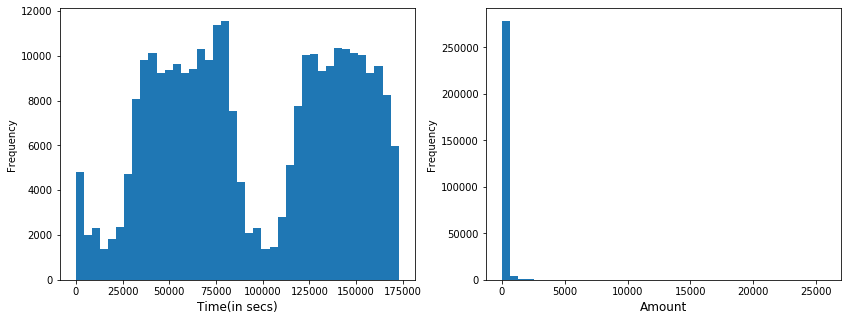

In [8]:
# Time & Amount distributions

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1)
data.Time.plot(kind = "hist", bins = 40)
plt.xlabel('Time(in secs)', size='large')
ax = fig.add_subplot(1,2,2)
data.Amount.plot(kind = "hist", bins = 40)
plt.xlabel('Amount', size='large')

#### Amount variable is heavily skewed

In [9]:

y = data.iloc[:,30]
X = data.iloc[:,0:30]

print(X.columns)
print(y.head(3))

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
0    0
1    0
2    0
Name: Class, dtype: int64


#### Original Data Split to build model using imbalanced data set

In [10]:
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size = 0.3, stratify = y)

X_train.shape
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [11]:
X_train_lg_reg = X_train
y_train_lg_reg = y_train

X_train.shape
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

####  Implement simple classifiers

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_lg_reg, y_train_lg_reg) 

LogisticRegression()

In [13]:
y_pred = logreg.predict(X_test)

In [14]:
metrics.roc_auc_score(y_test , y_pred) 

0.834183945068229

AUC -  0.834183945068229 



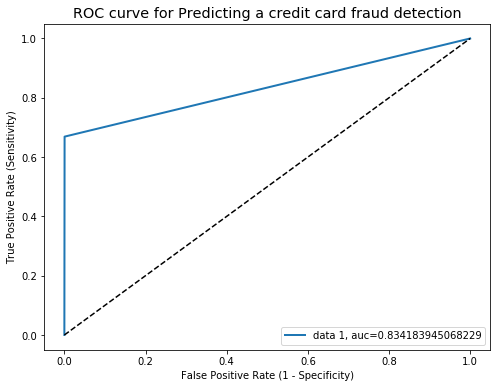

In [15]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [16]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99888
AUC : 0.83418
Precision : 0.67808
Recall : 0.66892
F1 : 0.67347


In [17]:
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train_lg_reg, y_train_lg_reg)
y_pred=classifier.predict(X_test)


In [18]:
metrics.roc_auc_score(y_test , y_pred) 

0.8444773544281136

AUC -  0.8444773544281136 



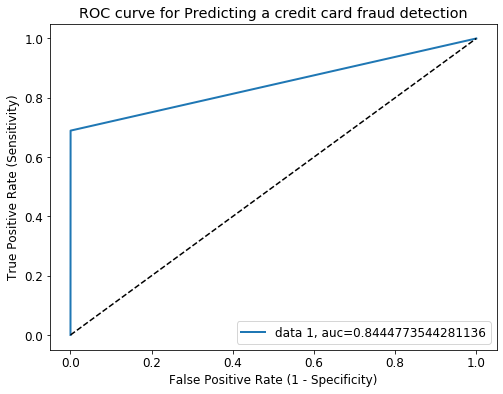

In [19]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [20]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99923
AUC : 0.84448
Precision : 0.83607
Recall : 0.68919
F1 : 0.75556


In [21]:
#Using the rbf kernel to build the initail model.
classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
#Fit into Model
classifier.fit(X_train_lg_reg, y_train_lg_reg)
#Predict the class using X_test
y_pred = classifier.predict(X_test)


In [22]:
metrics.roc_auc_score(y_test , y_pred)

0.6552998892555724

AUC -  0.6552998892555724 



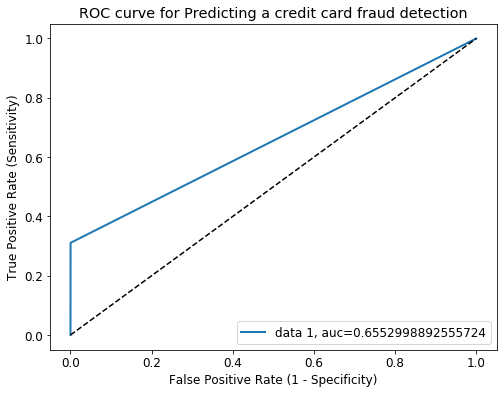

In [23]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [24]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99860
AUC : 0.65530
Precision : 0.71875
Recall : 0.31081
F1 : 0.43396


#### Model building using RandomForestClassifier and XGBClassifier with unbalanced data set

In [25]:
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size = 0.3, stratify = y)

X_train.shape
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [26]:
# A typical value to consider: sum(negative instances) / sum(positive instances)

weight = 199020/344

# Using Random Forest and XGBoost
rf = RandomForestClassifier(n_estimators=100, class_weight={0:1,1:7})
xg = XGBClassifier(scale_pos_weight = weight, learning_rate = 0.7,
                   reg_alpha= 0.8,
                   reg_lambda= 1)

rf1 = rf.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)

In [63]:
y_pred_rf = rf1.predict(X_test)
y_pred_xg= xg1.predict(X_test)

y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg))

print("RF:\n",confusion_matrix(y_test,y_pred_rf))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg))

fpr_rf1, tpr_rf1, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_xg1, tpr_xg1, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",metrics.auc(fpr_rf1,tpr_rf1))
print("XGBoost - AUC: ",metrics.auc(fpr_xg1,tpr_xg1))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)

RF - Accuracy -  0.9997542221129876
XGBoost - Accuracy -  0.9997542221129876
RF:
 [[85293     2]
 [   19   129]]
XGBoost:
 [[85290     5]
 [   16   132]]
RF - AUC:  0.9832483606180775
XGBoost - AUC:  0.9889448068151392


#### Accuracy, Precision, Recall and ROC-AUC score:
Note: When we try to build the prediction model with unbalanced dataset, then the model will be more inclined towards to detect new unseen transaction as genuine as our dataset contains about 99% genuine data. As our dataset is highly imbalanced, accuracy score cannot be used as a metric because it will be usually high and misleading, instead use we should focus on AUC, precision/recall score.

Precision --> How precise (how sure) is our model in detecting fraud transactions.
recall --> Amount of fraud cases our model is able to detect.

In reference of our case:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.
Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?
Accuracy: How correct the model is (misleading for fraud/imbalanced data)

Area Under the Curve (AUC) score --> Higher the AUC score, better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

Text(0.5, 1.0, 'Class Distribution \n 0: No Fraud and 1: Fraud')

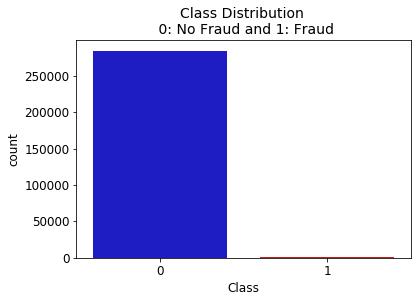

In [28]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distribution \n 0: No Fraud and 1: Fraud', fontsize=14)

In [29]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note:Our data is imbalanced as most of the transactions are non-fraud. As we want our model to detect patterns and not to  assume, we cannot use this dataframe as the base for our predictive models. As using imbalanced dataframe as the base model might lead to Overfitting: Model will assume that in most cases there are no frauds 

<Figure size 432x288 with 0 Axes>

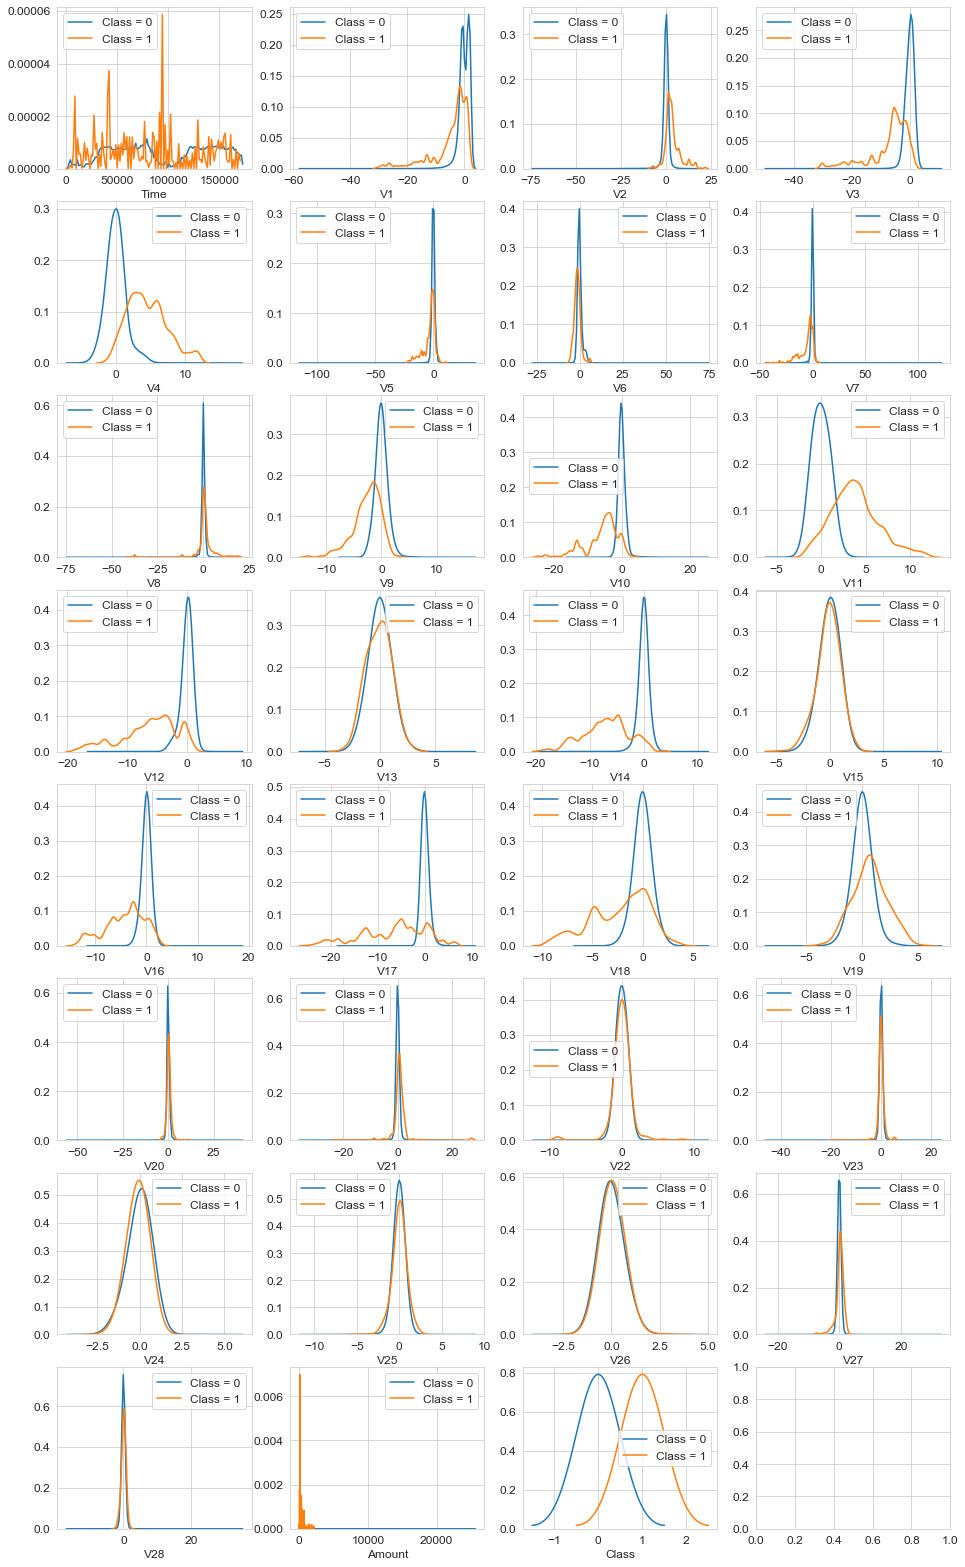

In [30]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

The features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution except Time and Amount.

In [31]:
log_trns_df = data.copy(deep=True)

In [32]:
log_trns_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

Note: Our data is already scaled we should split our training and test sets

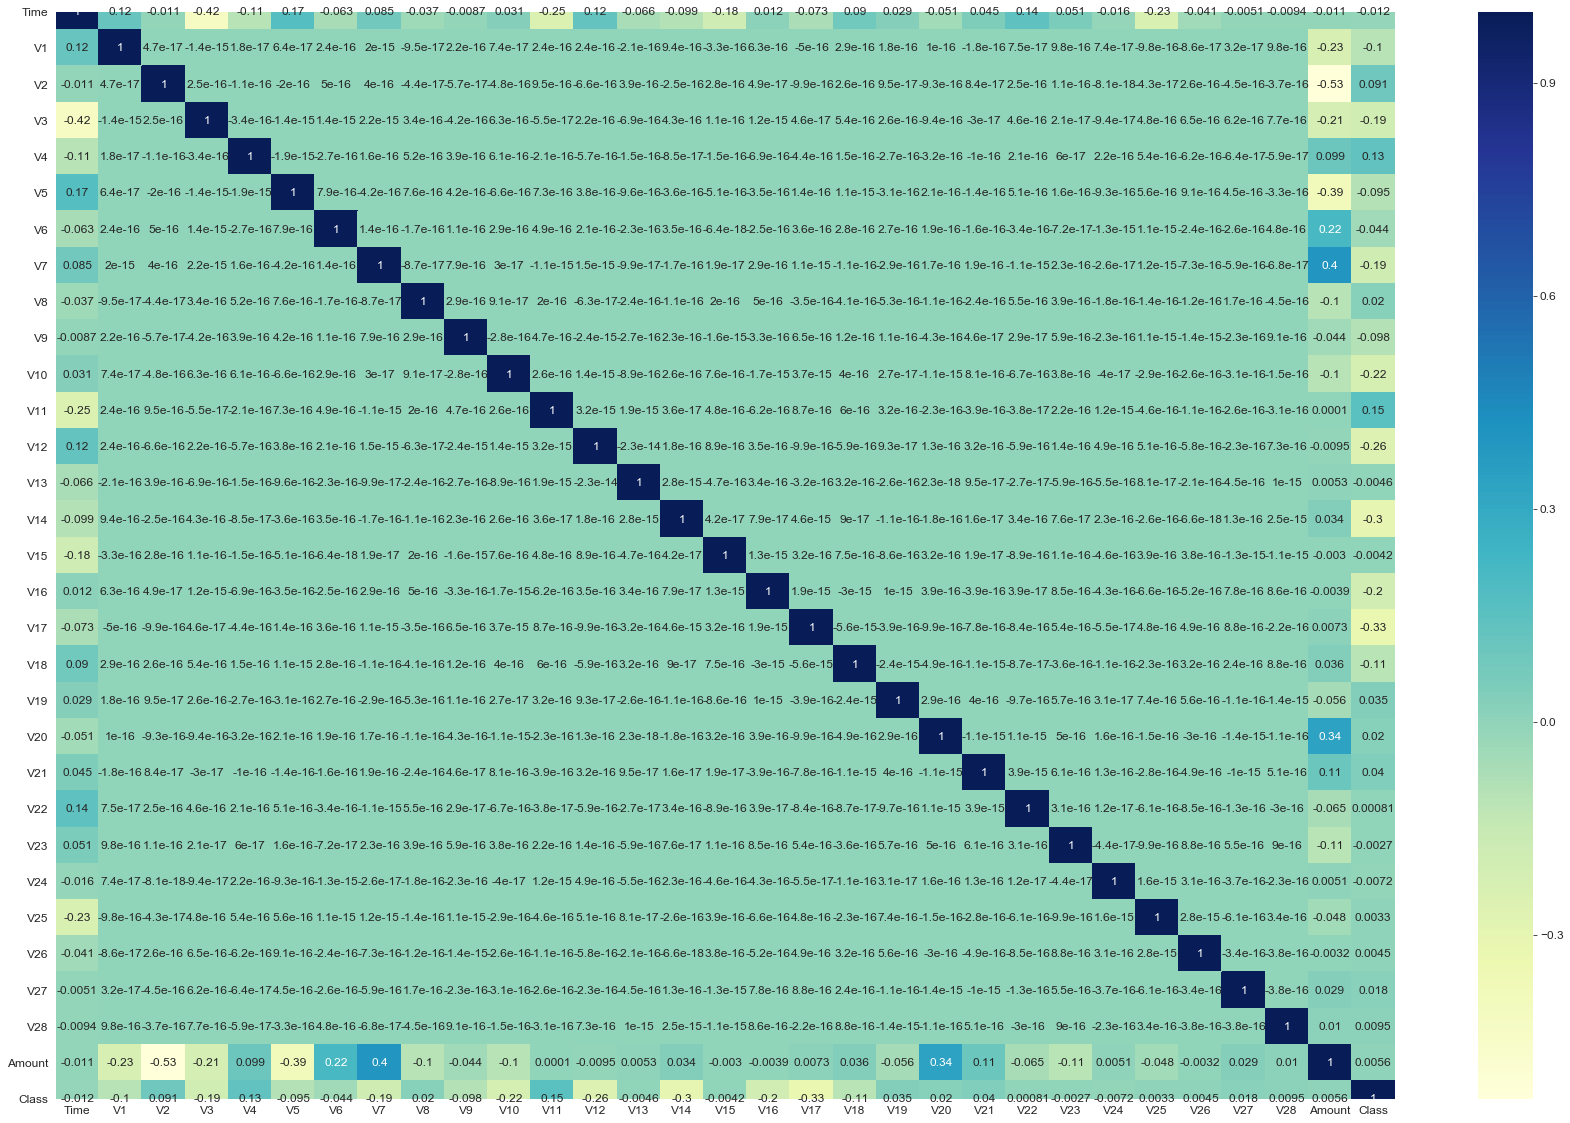

In [33]:
plt.figure(figsize=(30,20))

cor=log_trns_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

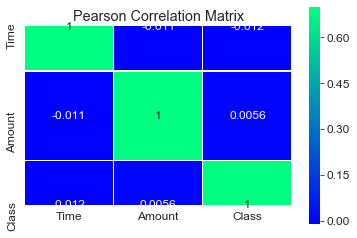

In [34]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(log_trns_df[['Time', 'Amount','Class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);

#### No features are highly correlated with any other features.

### Scale Amount Feature

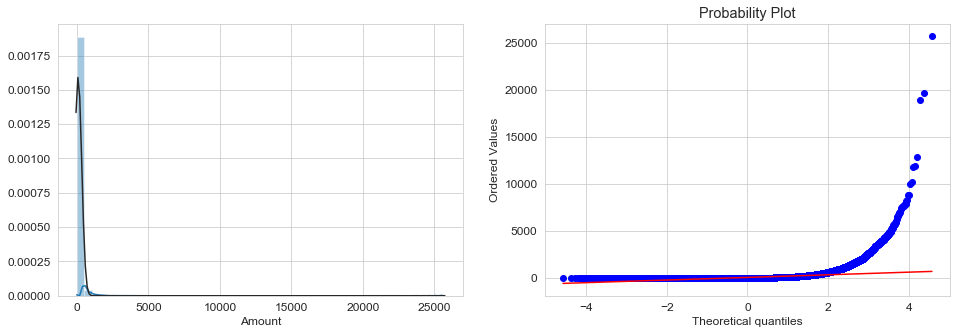

In [35]:
from scipy.stats import norm
from scipy.stats import probplot

#log_trns_df = org_df
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(log_trns_df.Amount,fit=norm)
plt.subplot(1,2,2)
probplot(log_trns_df.Amount,plot = plt)
plt.show()

In [36]:
log_trns_df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [37]:
print('Skewness:',log_trns_df.Amount.skew())
print('Kurtosis:',log_trns_df.Amount.kurt())

Skewness: 16.977724453761024
Kurtosis: 845.0926455465277


In [38]:

log_trns_df['Amount'] = np.log(log_trns_df['Amount'] + 1)

In [39]:
log_trns_df['Amount'].describe()

count    284807.000000
mean          3.152188
std           1.656648
min           0.000000
25%           1.887070
50%           3.135494
75%           4.358822
max          10.153941
Name: Amount, dtype: float64

In [40]:
print('Skewness:',log_trns_df.Amount.skew())
print('Kurtosis:',log_trns_df.Amount.kurt())

Skewness: 0.16270292774164014
Kurtosis: -0.6396966297263207


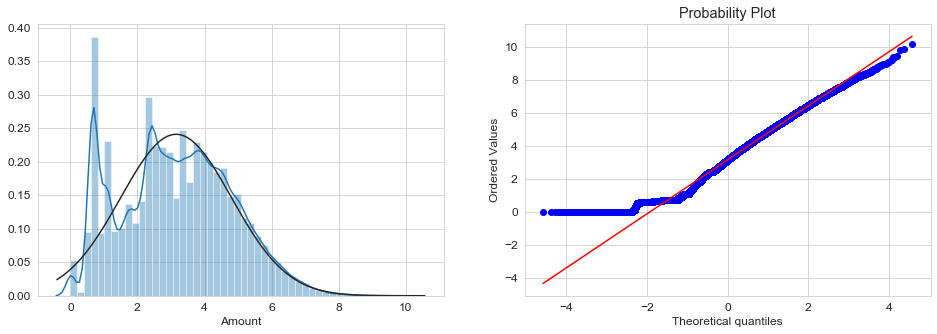

In [41]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(log_trns_df.Amount,fit=norm)
plt.subplot(1,2,2)
probplot(log_trns_df.Amount,plot = plt)
plt.show()

#### PCA transformed features are previously scaled, Hence further features scaling is not required.

In [42]:
# Since most of our data has been scaled we should scale the columns that are left to scale (Amount)
from sklearn.preprocessing import StandardScaler, RobustScaler

#  RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

log_trns_df['Amount'] = rob_scaler.fit_transform(log_trns_df['Amount'].values.reshape(-1,1))
log_trns_df['Time'] = rob_scaler.fit_transform(log_trns_df['Time'].values.reshape(-1,1))

# Dropping Time as it has least sinificance
#log_trns_df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [43]:
preprocessed_df = log_trns_df.copy(deep=True)

In [44]:
preprocessed_df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.994983  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -0.994972 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -0.994972 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.994960 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28    Amount  Class  
0 -0.021053  0.760297      0  
1  0.014724 -0.740312      0  
2 -0.059752  1.134330      0  
3  0.061458  0.683245      0  
4  0.215153  0.455970      0

### Model building using  with balanced data set using SMOTE and ADASYN


#### Logistic Regression, RandomForestClassifier and XGBClassifier

In [45]:
y = preprocessed_df['Class']
X = preprocessed_df.drop('Class', axis=1)


print(X.columns)
print(y.head(3))
X_prepro_train, X_test, y_prepro_train, y_test =   train_test_split(X, y, test_size = 0.3, stratify = y)

X_prepro_train.shape
y_prepro_train.value_counts()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
0    0
1    0
2    0
Name: Class, dtype: int64


0    199020
1       344
Name: Class, dtype: int64

The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud. Hence we are using oversampling techniques(SMOTE ADASYN) for data balancing.

#### Oversampling and balancing the dataset using SMOTE

In [46]:
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_sample(X_prepro_train, y_prepro_train)

columns = X_prepro_train.columns
X_bal = pd.DataFrame(data = X_bal, columns = columns)

print(X_prepro_train.shape)
print(X_bal.shape)
print(np.unique(y_bal, return_counts=True))

(199364, 30)
(398040, 30)
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [47]:
X_bal.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

#### RandomForestClassifier and XGBClassifier with SMOTE

In [48]:
# Initialising the models
rf_sm = RandomForestClassifier(n_estimators=100)
xg_sm = XGBClassifier(learning_rate=0.7,
                   reg_alpha= 0.8,
                   reg_lambda= 1
                   )

# training the models
rf_sm1 = rf_sm.fit(X_bal,y_bal)
xg_sm1 = xg_sm.fit(X_bal,y_bal)

In [62]:
print("With Smote: \n")

# Making predictions on the test data
y_pred_rf1 = rf_sm1.predict(X_test)
y_pred_xg1= xg_sm1.predict(X_test)

y_pred_rf_prob1 = rf_sm1.predict_proba(X_test)
y_pred_xg_prob1 = xg_sm1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf1))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg1))

print("RF:\n",confusion_matrix(y_test,y_pred_rf1))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg1))

fpr_rf2, tpr_rf2, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob1[: , 1],
                                 pos_label= 1
                                 )

fpr_xg2, tpr_xg2, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob1[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",metrics.auc(fpr_rf2,tpr_rf2))
print("XGBoost - AUC: ",metrics.auc(fpr_xg2,tpr_xg2))


With Smote: 

RF - Accuracy -  0.9997776295307983
XGBoost - Accuracy -  0.9997074072773662
RF:
 [[85288     7]
 [   12   136]]
XGBoost:
 [[85281    14]
 [   11   137]]
RF - AUC:  0.9954302872542511
XGBoost - AUC:  0.9939618937772405


#### Oversampling and balancing the dataset using ADASYN

In [50]:
X_prepro_train, X_test, y_prepro_train, y_test =   train_test_split(X, y, test_size = 0.3, stratify = y)

X_prepro_train.shape
y_prepro_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [51]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN(random_state=42)
X_ad, y_ad = ad.fit_sample(X_prepro_train, y_prepro_train)
 
X_ad = pd.DataFrame(data = X_ad, columns = X_prepro_train.columns)

print(X_prepro_train.shape)
print(X_ad.shape)
print(np.unique(y_bal, return_counts=True))

(199364, 30)
(398057, 30)
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


#### RandomForestClassifier and XGBClassifier with ADASYN

In [52]:
# Initialising the models
rf_ad = RandomForestClassifier(n_estimators=100)
xg_ad = XGBClassifier(learning_rate=0.8,
                   reg_alpha= 0.8,
                   reg_lambda= 0.8)

# training the models
rf_ad1 = rf_ad.fit(X_ad,y_ad)
xg_ad1 = xg_ad.fit(X_ad,y_ad)

In [65]:
print("With ADASYN:\n")
# Making predictions on the test data
y_pred_rf2 = rf_ad1.predict(X_test)
y_pred_xg2 = xg_ad1.predict(X_test)

y_pred_rf_prob2 = rf_ad1.predict_proba(X_test)
y_pred_xg_prob2 = xg_ad1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf2))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg2))

print("RF:\n",confusion_matrix(y_test,y_pred_rf2))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg2))

fpr_rf3, tpr_rf3, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob2[: , 1],
                                 pos_label= 1
                                 )

fpr_xg3, tpr_xg3, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob2[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",metrics.auc(fpr_rf3,tpr_rf3))
print("XGBoost - AUC: ",metrics.auc(fpr_xg3,tpr_xg3))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf2)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg2)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With ADASYN:

RF - Accuracy -  0.9994733330992591
XGBoost - Accuracy -  0.9992158515033414
RF:
 [[85280    15]
 [   30   118]]
XGBoost:
 [[85253    42]
 [   25   123]]
RF - AUC:  0.9764942576083324
XGBoost - AUC:  0.975543384406741
Random Forest:
 Precision:  [0.99964834 0.88721805] Recall:  [0.99982414 0.7972973 ]
XGBoost:
 Precision:  [0.99970684 0.74545455] Recall:  [0.99950759 0.83108108]


#### Logistic Regression with SMOTE data

In [54]:
X_lgreg_train, X_lgreg_test, y_lgreg_train, y_lgreg_test = \
                            train_test_split(X_bal, y_bal, test_size=0.3, shuffle=True, random_state=0)

# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_lgreg_train,y_lgreg_train)

y_pred = logreg.predict(X_lgreg_test)

In [55]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_lgreg_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_lgreg_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_lgreg_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_lgreg_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_lgreg_test , y_pred)))

Accuracy :0.94995
AUC : 0.94978
Precision : 0.97508
Recall : 0.92284
F1 : 0.94824


AUC -  0.9497758457738454 



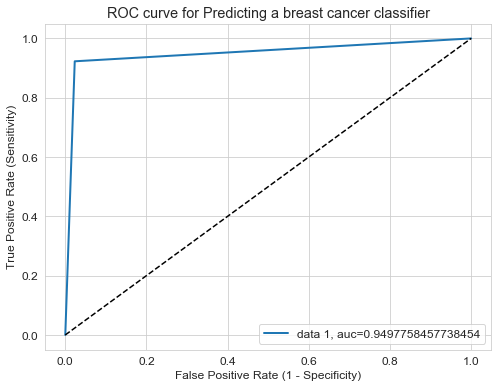

In [56]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_lgreg_test, y_pred)

auc = metrics.roc_auc_score(y_lgreg_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### Logistic Regression with ADASYN data

In [57]:
X_ad_lgrg_train, Xad_lgrg__test, y_ad_lgrg_train, y_ad_lgrg_test = \
            train_test_split(X_ad, y_ad, test_size=0.3, shuffle=True, random_state=0)

#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_ad_lgrg_train, y_ad_lgrg_train)

y_pred = logreg.predict(Xad_lgrg__test)

In [58]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_ad_lgrg_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_ad_lgrg_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_ad_lgrg_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_ad_lgrg_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_ad_lgrg_test , y_pred)))

Accuracy :0.90195
AUC : 0.90184
Precision : 0.91470
Recall : 0.88514
F1 : 0.89968


AUC -  0.9018389626036297 



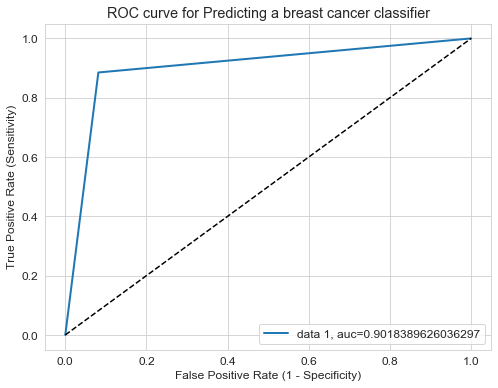

In [59]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_ad_lgrg_test, y_pred)

auc = metrics.roc_auc_score(y_ad_lgrg_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### ROC curves

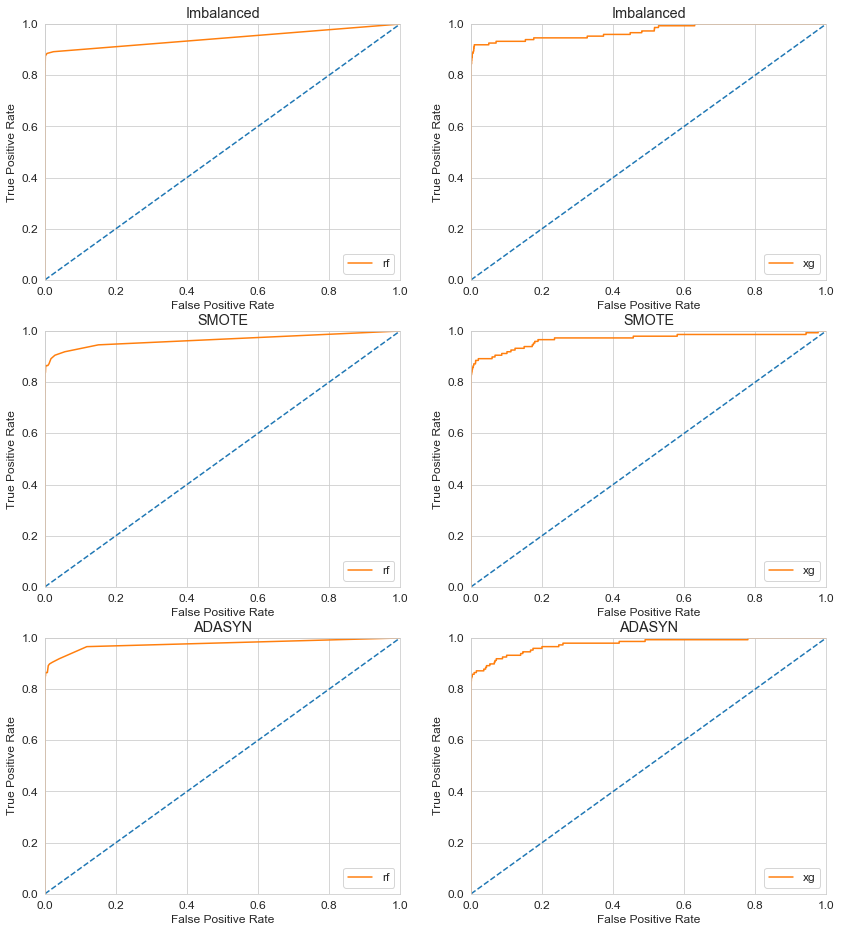

In [60]:
fig = plt.figure(figsize=(14,16))   # Create window frame


roc = [["Imbalanced", fpr_rf1, tpr_rf1,'rf'],["Imbalanced", fpr_xg1, tpr_xg1,'xg'],["SMOTE", fpr_rf2, tpr_rf2,'rf'],["SMOTE", fpr_xg2, tpr_xg2,'xg'],
["ADASYN", fpr_rf3, tpr_rf3,'rf'], ["ADASYN", fpr_xg3, tpr_xg3,'xg']]

for i in range(6):
    #8.1 Connect diagonals
    ax = fig.add_subplot(3,2,i+1) 
    ax.plot([0, 1], [0, 1], ls="--")  # Dashed diagonal line

    #8.2 Labels 
    ax.set_xlabel('False Positive Rate')  # Final plot decorations
    ax.set_ylabel('True Positive Rate')
    ax.set_title(roc[i][0])

    #8.3 Set graph limits
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])

    #8.4 Plot each graph now
    ax.plot(roc[i][1], roc[i][2], label = roc[i][3])

    #8.5 Set legend and show plot
    ax.legend(loc="lower right")

#### Precision - Recall curves

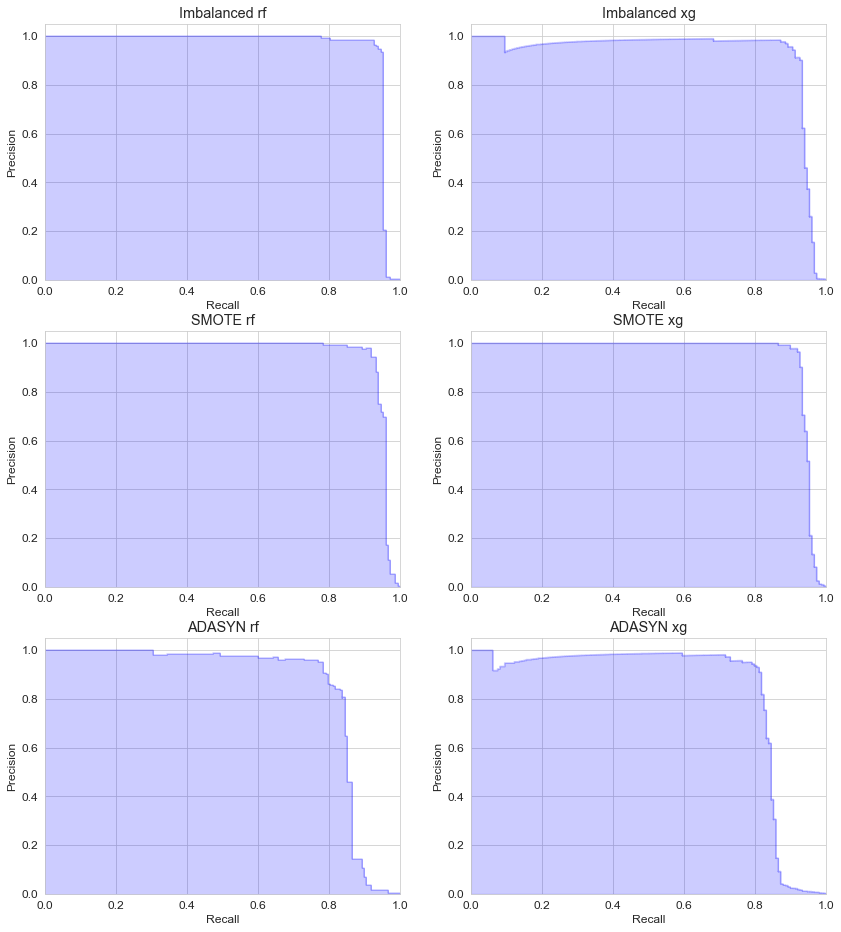

In [61]:
prc = [["Imbalanced", rf1,'rf'],["Imbalanced", xg1,'xg'],["SMOTE", rf_sm1,'rf'],["SMOTE", xg_sm1,'xg'],
["ADASYN", rf_ad1,'rf'], ["ADASYN", xg_ad1,'xg']]

fig = plt.figure(figsize=(14,16))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
   
    precision, recall, _ = precision_recall_curve(y_test,prc[i][1].predict_proba(X_test)[:,-1])

    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    ttl = prc[i][0]+' '+prc[i][2]
    plt.title(ttl)

### Model Comparision using SMOTE and ADASYN 

#### Logistic Regression:
   #### With Unbalanced data
       Accuracy :0.99896
       AUC : 0.87470
       Precision : 0.68098
       Recall : 0.75000
       F1 : 0.71383
   ####  With SMOTE:
    Accuracy :0.95563
    AUC : 0.95551
    Precision : 0.97362
    Recall : 0.93607
    F1 : 0.95448
   #### ADASYN
    Accuracy :0.90167
    AUC : 0.90160
    Precision : 0.90787
    Recall : 0.89231
    F1 : 0.90002
    
#### Note: Logistic Regression with SMOTE performed better than ADASYN
    
### RandomForestClassifier and XGBClassifier with unbalanced data set

###### RF - AUC:  0.9582223380540985
###### XGBoost - AUC:  0.9832203972540451
###### Random Forest:  Precision:  [0.99969527 1.        ] Recall:  [1.         0.82432432]
###### XGBoost: Precision:  [0.9997304 0.9469697] Recall:  [0.99991793 0.84459459]
    
### With Smote: 

###### RF - Accuracy -  0.9997308146951769
###### XGBoost - Accuracy -  0.9995552590615966

###### RF - AUC:  0.9950056481242366
###### XGBoost - AUC:  0.9963459091895694

###### Random Forest: Precision:  [0.99975385 0.98449612] Recall:  [0.99997655 0.85810811]
###### XGBoost: Precision:  [0.99977724 0.87162162] Recall:  [0.99977724 0.87162162]

### With ADASYN:

###### RF - Accuracy -  0.9996254813150287
###### XGBoost - Accuracy -  0.9996254813150287

###### RF - AUC:  0.9860812553570042
###### XGBoost - AUC:  0.9906747330013641

###### Random Forest: Precision:  [0.99966011 0.97540984] Recall:  [0.99996483 0.80405405]
###### XGBoost:  Precision:  [0.99978898 0.90277778] Recall:  [0.99983586 0.87837838]

### Summary: 
#### SVC(AUC - 0.68) and KNeighborsClassifiers are not preferred for large datasets as they take very long time to fit the data.
#### RandomForestClassifier is preferred over DecisionTreeClassifier as RandomForestClassifier is an eneamble of Decision Trees.
#### Models performance is improved with oversampling techniques(SMOTE/ADASYN) 
#### XGBoost algorithms performed better with oversampling techniques(SMOTE and ADASYN), than Logistic Regression with SMOTE and ADASYN  for unbalanced data sets.
#### Random Forest classifier with oversampling techniques also performed good with lesser computational speed compared to XGBoost Algorithm